# HW250506-implement_a_neural_network

## Exercise 0
* use PyTorch tensor object to calculate the output of the hidden nodes and output nodes

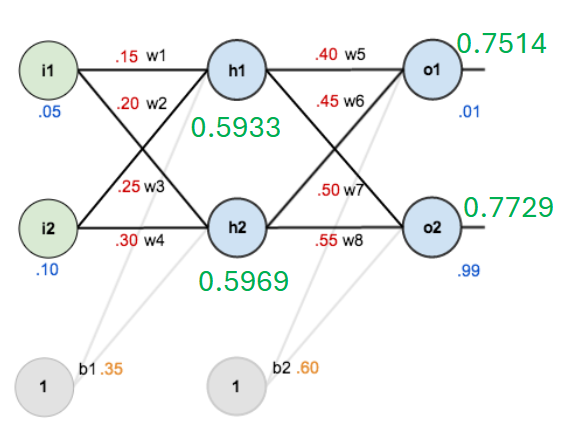

In [64]:
import torch

# input, target, 1 * 2
i = torch.tensor([[.05, .10]])
target = torch.tensor([[.01, .99]])

# weight: i to h, 2 * 2, row 1 for i1, row 2 for i2.
w_ih = torch.tensor([[.15, .25], [.20, .30]])
# weight: h to o, 2 * 2, row 1 for h1, row 2 for h2.
w_ho = torch.tensor([[.40, .50], [.45, .55]])
# b1, b2
b1 = torch.tensor([.35])
b2 = torch.tensor([.60])

* Calculate $net_{h1}$
$$
net_{h1} = i_1 * w_1 + i_2 * w_2 + b * bw_1
$$
``` Python
net_h = i @ w_ih + b1
```
* Calculate $Out_{h1}$
$$
Out_{h1} = \frac{1}{1+exp^{-net_{h1}}}
$$
``` Python
out_h = net_h.sigmoid()
```

In [65]:
# calculate out_h1, out_h2, 1 * 2
net_h = i @ w_ih + b1
print("net_h:", net_h)
out_h = net_h.sigmoid()
print("h1, h2:", out_h, "<--- [output of the hidden nodes.]")

# calculate out_o1, out_o2, 1 * 2
net_o = out_h @ w_ho + b2
print("net_o:", net_o)
out_o = net_o.sigmoid()
print("o1, o2:", out_o, "<--- [output of the output nodes.]")

net_h: tensor([[0.3775, 0.3925]])
h1, h2: tensor([[0.5933, 0.5969]]) <--- [output of the hidden nodes.]
net_o: tensor([[1.1059, 1.2249]])
o1, o2: tensor([[0.7514, 0.7729]]) <--- [output of the output nodes.]


## Exercise 1: train a simple neural network
1. train the following neural network, and print the weights, bias, outputs, errors, in the first run.
2. run 1000 epochs, and plot the loss results

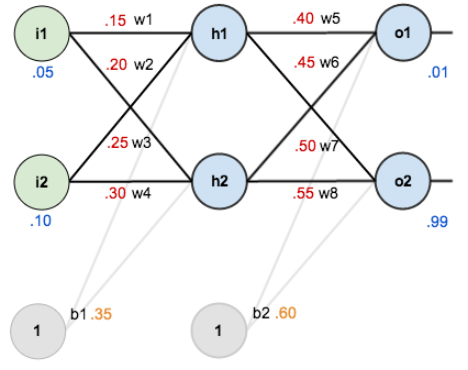

* Training input: (0.05, 0.10)
* Target output: (0.01, 0.99)
* the activation function is a sigmoid function $ \begin{align} Sigmoid(x) = \frac {1}{1 + exp^{(-x)}} \end{align} $

In [66]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# input, target, 1 * 2
i = torch.tensor([[.05, .10]])
target = torch.tensor([[.01, .99]])

# weight: i to h, 2 * 2, row 1 for i1, row 2 for i2.
w_ih = torch.tensor([[.15, .25], [.20, .30]], requires_grad = True)
# weight: h to o, 2 * 2, row 1 for h1, row 2 for h2.
w_ho = torch.tensor([[.40, .50], [.45, .55]], requires_grad = True)
# b1, b2
b1 = torch.tensor([.35], requires_grad = True)
b2 = torch.tensor([.60], requires_grad = True)

* Calculate $E_{total}$
$$
E_{total} = E_{o1} + E_{o2}
$$
$$
E_{o1} = \frac{1}{2}(target_{o1} - Out_{o1})^2
$$
``` Python
err = target - out_o
err = err.pow(2).sum() / 2.0
```
* Update weights 
$$
W_5^+ = W_5 - \eta * \frac{\partial E_t}{\partial W_5}
$$
``` Python
lr = torch.tensor([0.5])
err.backward()
with torch.no_grad():
    w_ih -= lr * w_ih.grad
    w_ho -= lr * w_ho.grad
    b1   -= lr * b1.grad
    b2   -= lr * b2.grad
```

net_h: tensor([[0.3775, 0.3925]], grad_fn=<AddBackward0>)
h1, h2: tensor([[0.5933, 0.5969]], grad_fn=<SigmoidBackward0>) <--- [output of the hidden nodes.]
net_o: tensor([[1.1059, 1.2249]], grad_fn=<AddBackward0>)
o1, o2: tensor([[0.7514, 0.7729]], grad_fn=<SigmoidBackward0>) <--- [output of the output nodes.]
Error:  tensor(0.2984, grad_fn=<DivBackward0>)
w_ih:  tensor([[0.1498, 0.2498],
        [0.1996, 0.2995]], requires_grad=True)
w_ho:  tensor([[0.3589, 0.5113],
        [0.4087, 0.5614]], requires_grad=True)
bias_b1:  tensor([0.3406], requires_grad=True)
bias_b2:  tensor([0.5498], requires_grad=True)
loss[] =  9.999990288633853e-05


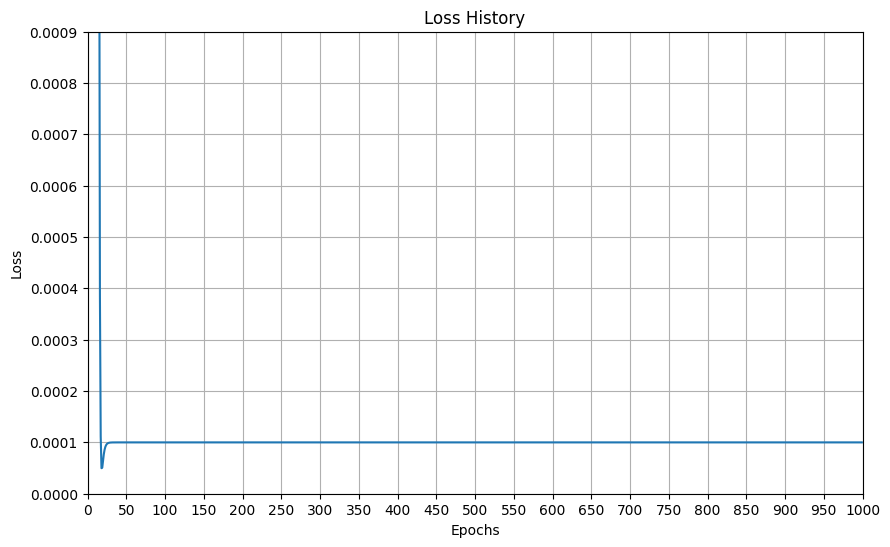

In [67]:
loss_hist = [] # loss history
for _ in range(1000): # epoch = 1000
    # calculate out_h1, out_h2, 1 * 2
    net_h = i @ w_ih + b1
    out_h = net_h.sigmoid()

    # calculate out_o1, out_o2, 1 * 2
    net_o = out_h @ w_ho + b2
    out_o = net_o.sigmoid()
    
    err = target - out_o
    err = err.pow(2).sum() / 2.0
    loss_hist.append(err.item())
    
    # learning rate = 0.5
    lr = torch.tensor([0.5])
    err.backward()
    with torch.no_grad():
        w_ih -= lr * w_ih.grad
        w_ho -= lr * w_ho.grad
        b1   -= lr * b1.grad
        b2   -= lr * b2.grad
    
    # weights, bias, outputs, errors,
    if _ == 0:
        print("net_h:", net_h)
        print("h1, h2:", out_h, "<--- [output of the hidden nodes.]")
        print("net_o:", net_o)
        print("o1, o2:", out_o, "<--- [output of the output nodes.]")
        print("Error: ", err)
        print("w_ih: ", w_ih)
        print("w_ho: ", w_ho)
        print("bias_b1: ", b1)
        print("bias_b2: ", b2)

print("loss[] = ", loss_hist[-1])

plt.figure(figsize=(10,6))
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, 1000)
plt.ylim(0, 0.0009)
plt.xticks(np.linspace(0, 1000, 21))
plt.grid()
plt.plot(loss_hist, label = "Loss")
plt.show()

## Exercise 2:
Verify your answer of last week homework

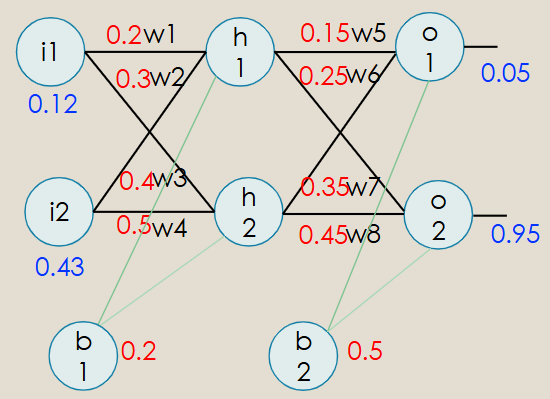

In [69]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# input, target, 1 * 2
i = torch.tensor([[.12, .43]])
target = torch.tensor([[.05, .95]])

# weight: i to h, 2 * 2, row 1 for i1, row 2 for i2.
w_ih = torch.tensor([[.20, .40], [.30, .50]], requires_grad = True)
# weight: h to o, 2 * 2, row 1 for h1, row 2 for h2.
w_ho = torch.tensor([[.15, .35], [.25, .45]], requires_grad = True)
# b1, b2
b1 = torch.tensor([.20], requires_grad = True)
b2 = torch.tensor([.50], requires_grad = True)

loss_hist = [] # loss history
for _ in range(1): # epoch = 1
    # calculate out_h1, out_h2, 1 * 2
    net_h = i @ w_ih + b1
    out_h = net_h.sigmoid()

    # calculate out_o1, out_o2, 1 * 2
    net_o = out_h @ w_ho + b2
    out_o = net_o.sigmoid()
    
    err = target - out_o
    err = err.pow(2).sum() / 2.0
    loss_hist.append(err.item())
    
    # learning rate = 0.5
    lr = torch.tensor([0.5])
    err.backward()
    with torch.no_grad():
        w_ih -= lr * w_ih.grad
        w_ho -= lr * w_ho.grad
        b1   -= lr * b1.grad
        b2   -= lr * b2.grad
    
    # weights, bias, outputs, errors,
    if _ == 0:
        print("w_ih: ", w_ih)
        print("w_ho: ", w_ho)
        print("bias_b1: ", b1)
        print("bias_b2: ", b2)
        print("net_h:", net_h)
        print("h1, h2:", out_h, "<--- [output of the hidden nodes.]")
        print("net_o:", net_o)
        print("o1, o2:", out_o, "<--- [output of the output nodes.]")
        print("Errors: ", err)

w_ih:  tensor([[0.1999, 0.3998],
        [0.2997, 0.4993]], requires_grad=True)
w_ho:  tensor([[0.1097, 0.3630],
        [0.2079, 0.4635]], requires_grad=True)
bias_b1:  tensor([0.1977], requires_grad=True)
bias_b2:  tensor([0.4535], requires_grad=True)
net_h: tensor([[0.3530, 0.4630]], grad_fn=<AddBackward0>)
h1, h2: tensor([[0.5873, 0.6137]], grad_fn=<SigmoidBackward0>) <--- [output of the hidden nodes.]
net_o: tensor([[0.7415, 0.9817]], grad_fn=<AddBackward0>)
o1, o2: tensor([[0.6773, 0.7275]], grad_fn=<SigmoidBackward0>) <--- [output of the output nodes.]
Errors:  tensor(0.2215, grad_fn=<DivBackward0>)
